# 3. Word frequencies

The notebook on *Tokenisation* explained how we can divide a text into the separate words. Once we have managed to do this, we can begin to count the **types** (i.e. the occurrences of the unique words). 

We can use a dictionary for this specific task. This specific data structure is useful in this situation, as it can be used to store pairs of values. In a dictionary created to store word frequencies, we can use the types that found in the text as keys, and, as associated values, we can capture the number of times these types occur. 

To count the number of times of word occurs in a text, we can choose the following approach: 

1. Create a Python list of all the individual words (or *tokens*) of the text. 
2. Iterate over all of these words.
3. Add each word as a key to a dictionary. At the first occurrence of the word, assign the value 1. For all the occurrences that follow, increment the current value associated with word by 1. 

The code below contains an implementation of these steps. It combines some of the concepts that have been discussed fo far. 

It firstly defined a string named `quote`. The individual words in this string are found using the `word_tokenize()` method. The `remove_punctuation()` method, defined in `tdmh`, removes tokes that do not contain any alphanumeric characters. 

The code then navigates across all the of the words in the string, using a `for` loop. The code is also assumed that the tokens should be processed in a case-insensitive ways. The token 'We' (starting with a capital) should be analysed as an instance of the token 'we' (with the first character in lower case). We can accomplish this by converted all words into lower case using the `lower()` method.

The words that are found in this way will become keys in the dictionary named `freq` (short for 'frequency'). Initially, this dictionary is completely empty. At the first occurrence of a given word, the word will clearly not be in this dictionary yet. In this case, the `get()` method returns the value `0`. This initial value will immediately be incremented with value `1`. After this, the existing value will be updated, with every new occurrence of the word in the text. 

The program does this for each individual word. Once Python has processed the full text, the dictionary `freq` will have data about the occurrences of all the words in this full string. 

The final few lines of this code snippet print the frequencies of the all the words that were found in the quote.


In [1]:
from nltk import word_tokenize
from tdmh import * 


freq = dict()

quote = '''It was the best of times, it was the worst of times, 
it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity'''

words = word_tokenize(quote)
words = remove_punctuation(words)

for w in words:
    w = w.lower()
    freq[w] = freq.get( w, 0 ) + 1
         
for f in freq:
    word = 'occurrence'
    if freq[f] > 1:
        word += 's'
    print( f' "{f}" => {freq[f]} {word}' )


 "it" => 6 occurrences
 "was" => 6 occurrences
 "the" => 6 occurrences
 "best" => 1 occurrence
 "of" => 6 occurrences
 "times" => 2 occurrences
 "worst" => 1 occurrence
 "age" => 2 occurrences
 "wisdom" => 1 occurrence
 "foolishness" => 1 occurrence
 "epoch" => 2 occurrences
 "belief" => 1 occurrence
 "incredulity" => 1 occurrence


The keys in the dictionary named `freq` are stored in a specific order: the order in which they were found in the original text fragment. 

When you aim to analyse word frequencies, you may want to display the items in a different order. It can be useful, for example, to sort the list by frequency, and to make sure that the words with the highest frequencies are shown at the top of the list. 

The standard `sorted()` function can only sort dictionaries on the basis of the keys, unfortunately. There is no standard method in Python that you can use to sort a dictionary by its values. To address this lacuna, we can define a new method.  

In [2]:
def sortedByValue( dict , ascending = True ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}


For the purpose of this tutorial, you do not need to understand the full details of this new method. For the time being, you can treat this function as a 'black box'. This function demands a dictionary as input, and it returns a **sorted** dictionary as output. importantly, the function sorts by the **values** and not by the keys. 

The cell below offers a demonstration. 

In [3]:
for f in sortedByValue( freq ) :
    print( f'{f} -> {freq[f]}' )

best -> 1
worst -> 1
wisdom -> 1
foolishness -> 1
belief -> 1
incredulity -> 1
times -> 2
age -> 2
epoch -> 2
it -> 6
was -> 6
the -> 6
of -> 6


The function `sortedByValue()` sorts the values in an ascending order by default. To display the values in a descending order, you can supply a parameter named `ascending` with value `False`.

In [4]:
for f in sortedByValue( freq , ascending = False ) :
    print( f'{f} -> {freq[f]}' )

of -> 6
the -> 6
was -> 6
it -> 6
epoch -> 2
age -> 2
times -> 2
incredulity -> 1
belief -> 1
foolishness -> 1
wisdom -> 1
worst -> 1
best -> 1


## Stopwords

In normal texts, lexical categories such pronouns, prepositions or articles (words such as 'the', 'of' and 'it') are generally most common. Such words are sometimes referred to as 'function words'. Words such as these are important for producting grammatically correct sentences, but they mostly have little expessive value independently.

If you are interested in studying the actual contents or the semantics of a text, it can be useful to remove such frequently used function words. 

If you want to do this, one option is to make use of the list of stopwords available as part of the `nltk` package. 

In [ ]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

print(stopwords)

The code below is is a revision of the code that was discussed earlier for calculating the word frequencies. The only difference is that there is a condition in the first `for` loop. This condition has the effect that words will be added to the dictionary `freq` only if they are NOT on the list of stopwords.

In [6]:
freq = dict()

words = word_tokenize(quote)
words = remove_punctuation(words)


for w in words:
    w = w.lower()
    if w not in stopwords:
        freq[w] = freq.get(w,0) + 1

for f in sortedByValue( freq , ascending = False ) :
    print( f'{f} -> {freq[f]}' )

epoch -> 2
age -> 2
times -> 2
incredulity -> 1
belief -> 1
foolishness -> 1
wisdom -> 1
worst -> 1
best -> 1


## A word cloud

The code below can be used to visualise a given dictionary with a word frequencies into a word cloud. 

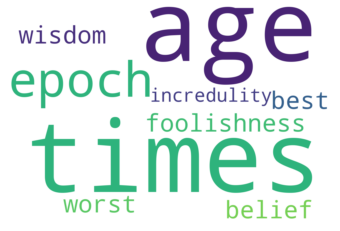

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

wordcloud = WordCloud( background_color="white",  width=1500,height=1000, max_words= 100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


If the code above produced an error message, this may be caused by the fact that `wordcloud` module has not been inestalled yet on your computer. In that case, you may need to install the `wordcloud` module using the commands in the cell below:

In [ ]:
import sys
!pip install wordcloud

## Caveats


The code that was explained in this notebook tokenises texts using the `word_tokenize()` method from `nltk`. As was explained, this method treats all the punction marks as separate tokens. Arguably, such occurrences of semi-colons, dots, commas and quotes should be ignored when we calculate the frequencies of words. We can do this by using a method which removes the tokens that don't contain any alphanumerical characters. 

In the case of tokens containing the genitival 's' (e.g. as in "the people's choice" or "the child's parents", `nltk` aims to separate the final 's' from the rest of the word. As a result of this, the character 's' will likewise be viewed and processed as a separate token. 

Something siliar happens with the various parts of contracted verb forms. `nltk` aims to separate the stem from the rest of token in forms such as "don't", "i'm" and "weren't", but this results in tokens such as "'nt", "'m" and "'t", respectively.  

The question whether words in the genitival forms and contracted verb forms must be counted separately is of course open to debate. It can be useful to know, however, that such 'incomplete' tokens are also on `nltk`'s list of stopwords. When you filter the list of tokens using these stopwords, you will also get rid of seemingly nonsensical tokens such as "'m", "'s" and "'t". 

# Exercises

## Exercise 3.1.

Answer the following questions about this text file named "ARoomWithAView.txt", which you can find in the folder named 'Corpus'. 

* How many characters are there in the novel?
* How many words does the novel contain?
* What are the 25 most frequent words if we exclude stop words?
* How many times does the novel contain the token 'Darcy'?


## Exercise 3.2.

Can you create a line chart that visualised the frequencies of the 25 most common words in *A Room with a View*? For this exercise, you can reuse some of the results of exercise 3.1.  

To get hold of the values to be shown on the x-axis and the y-axis, you can use the `keys()` and the `values()` methods that are available for dictionaries. These methods result in specific types of objects which are called  `dict_keys` and `dict_values`. It is not easy to select the first 25 items form such object. To do this, however you can convert these objects to lists, using `list()`. 
